# Line Charts
---

In this  lesson, you'll learn to create professional looking line charts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset used tracks global daily streams on music streaming service Spotify:

In [2]:
org_data = pd.read_csv('examples/spotify_data.csv')
org_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


We first do data transformation so that we can perform visualisation on it:

In [4]:
# aggregate streams after grouping by track name and date
tf_data = org_data.groupby(['Track Name','Date']).sum().sort_values('Streams', ascending=False)
tf_data = tf_data.reset_index(level=0)  # split multiindex to retain only date as index

# we only want 5 songs
shape_of_you = tf_data[tf_data['Track Name'] == 'Shape of You']
despacito = tf_data[(tf_data['Track Name'] == 'Despacito (Featuring Daddy Yankee)') | 
                    (tf_data['Track Name'] == 'Despacito - Remix')].groupby('Date').sum()
something_like_this = tf_data[tf_data['Track Name'] == 'Something Just Like This']
unforgettable = tf_data[tf_data['Track Name'] == 'Unforgettable']
humble = tf_data[tf_data['Track Name'] == 'HUMBLE.']

# we keep only the streams value and rename to track name
shape_of_you = shape_of_you['Streams'].rename('Shape of You')
despacito = despacito['Streams'].rename('Despacito')
something_like_this = something_like_this['Streams'].rename('Something Just Like This')
unforgettable = unforgettable['Streams'].rename('Unforgettable')
humble = humble['Streams'].rename('HUMBLE.')

# we merge all the 5 series into a single dataframe
spotify_data = pd.concat([shape_of_you, despacito, something_like_this, unforgettable, humble], axis=1).sort_index()
spotify_data.index = pd.to_datetime(spotify_data.index)  # convert index column to datetime format
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,Unforgettable,HUMBLE.
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


In [4]:
# Print the last five rows of the data
spotify_data.tail()

,Shape of You,Despacito,Something Just Like This,Unforgettable,HUMBLE.
Date,,,,,
2018-01-05,4492978,3450315.0,2408365.0,3093472.0,2685857.0
2018-01-06,4416476,3394284.0,2188035.0,2939822.0,2559044.0
2018-01-07,4009104,3020789.0,1908129.0,2620168.0,2350985.0
2018-01-08,4135505,2755266.0,2023251.0,2845882.0,2523265.0
2018-01-09,4168506,2791601.0,2058016.0,2844754.0,2727678.0


## Plot the data

Now that the dataset is loaded, we need only one line of code to make a line chart!

<AxesSubplot:xlabel='Date'>

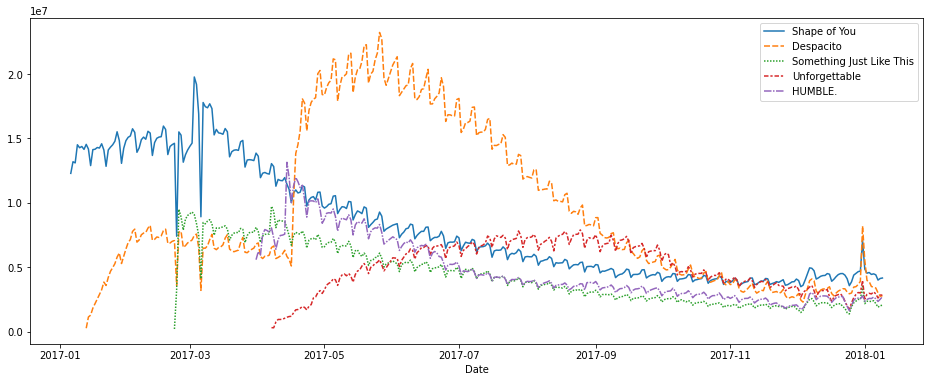

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing daily global streams of each song 
sns.lineplot(data=spotify_data)

From the above example, the line of code is relatively short and has two main components:

+ `sns.lineplot` tells the notebook that we want to create a line chart.
+ `data=spotify_data` selects the data that will be used to create the chart.

## Plot a subset of the data

So far, you've learned how to plot a line for every column in the dataset. In this section, you'll learn how to plot a subset of the columns.

We'll begin by printing the names of all columns. This is done with one line of code and can be adapted for any dataset by just swapping out the name of the dataset (in this case, spotify_data).

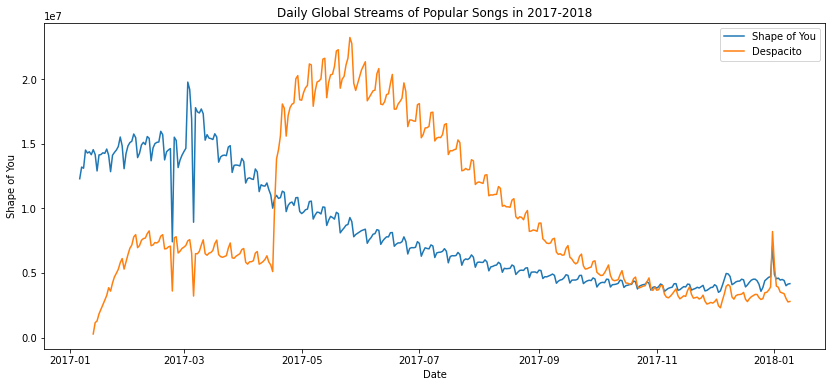

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Global Streams of Popular Songs in 2017-2018")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")

# Add label for horizontal axis
plt.xlabel("Date")
plt.show()  # See note below

The first two lines of code set the title and size of the figure. 

The next two lines each add a line to the line chart. For instance, consider the first one, which adds the line for "Shape of You":

```python
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")
```

This line looks really similar to the code we used when we plotted every line in the dataset, but it has a few key differences:

+ Instead of setting data=spotify_data, we set data=spotify_data['Shape of You']. In general, to plot only a single column, we use this format with putting the name of the column in single quotes and enclosing it in square brackets.
+ We also add label="Shape of You" to make the line appear in the legend and set its corresponding label.

The second last line of code modifies the label for the horizontal axis (or x-axis), where the desired label is placed in quotation marks ("...").

***Note:*** *The `plt.show()` is necessary if Matplotlib is used in a terminal or scripts. If used in IPython shell or a notebook, `plt.show()` is unnecessary. Thus even without `plt.show()`, the line charts will be plotted as shown in a much earlier example on this Jupyter notebook.*

We can also configure the location of the legend and rotate the xtick labels:

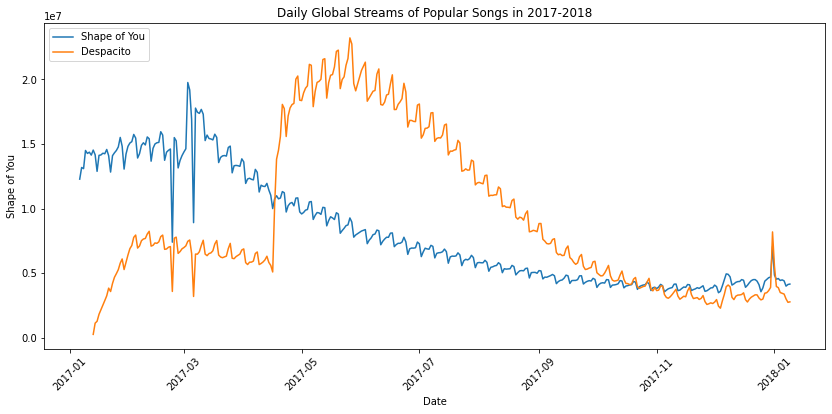

In [15]:
plt.figure(figsize=(14,6))

plt.title("Daily Global Streams of Popular Songs in 2017-2018")
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You")
sns.lineplot(data=spotify_data['Despacito'], label="Despacito")
plt.xlabel("Date")

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45)

# Shift legend to upper left
plt.legend(loc='upper left')

Next up, we'll learn about [bar charts and heatmaps](https://github.com/colintwh/visualisation/blob/master/barcharts_heatmap.ipynb)